# Normalizing Image Function for LEGO MiniFigure

Function to normalize each of the image based on file path given by the metadata

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision as tv
import torch
import pandas as pd
import skimage
from skimage import io

## Starting with an example to get a better idea of how to write the function

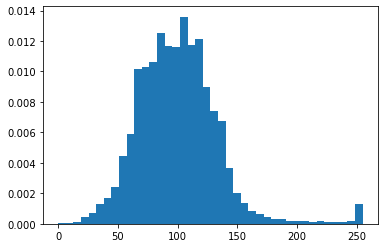

In [2]:
path = "marvel/0001/001.jpg"
img = Image.open(path)

#Converts image to a numpy array
img_nparr = np.array(img)
test = io.imread(path)
#Creating histogram
in_hist = plt.hist(test.ravel(), bins = 40, density = True)

### Convert PIL image to PyTorch Tensor image

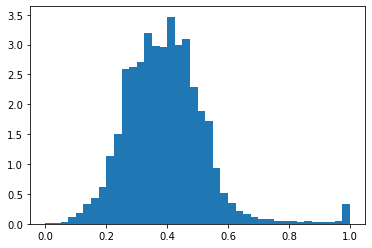

In [3]:
#Tensor transformation
transform1 = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

#Putting image into function
tensor_img = transform1(img)
tensor_img_nparr = np.array(tensor_img)

#Another histogram
tensor_in_hist = plt.hist(tensor_img_nparr.ravel(), bins = 40, density = True)

In [4]:
#Finding mean and std of dataset
std, mean = torch.std_mean(tensor_img,[1,2])
print("Before normalizing --> Mean: " + str(mean) + " | STD: " + str(std))

Before normalizing --> Mean: tensor([0.4404, 0.3913, 0.3464]) | STD: tensor([0.1444, 0.1116, 0.1189])


### Normalizing based on mean/std

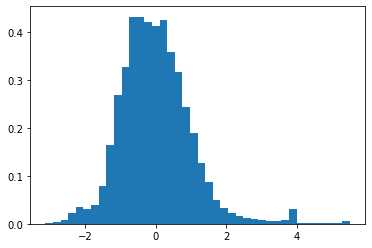

In [5]:
#Creating another transform func
transform1_norm = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean,std)
])

#Transforming image to normalized tensor
norm_img = transform1_norm(img)
norm_img_nparr = np.array(norm_img)

#Yet another histogram
tensor_in_hist = plt.hist(norm_img_nparr.ravel(), bins = 40, density = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 2.1653e-08,  1.2387e-07, -1.1967e-07]) tensor([1., 1., 1.])


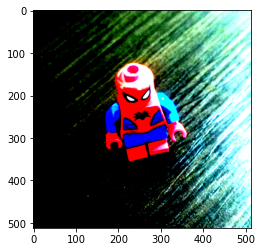

In [6]:
norm_img_view = norm_img_nparr.transpose(1,2,0)
plt.imshow(norm_img_view)

mean, std = norm_img.mean([1,2]), norm_img.std([1,2])
print(mean,std)

# Applying Above to Functions

df = pd.read_csv('data_all.csv')
df = df.drop(['Unnamed: 0','tmp_name','class_id'], axis = 1)

def show_image(path):
    img = Image.open(path)
    plt.imshow(img)
    
df.head()

In [19]:
df = pd.read_csv('data_all.csv')
#Convert the csv into a torch dataset
class LEGODataSet(torch.utils.data.Dataset):
    def __init__(self, csv_file, root_dir):
        self.df = pd.read_csv(csv_file)
        #Dropping unnecessary columns
        self.df = df.drop(['Unnamed: 0','tmp_name','class_id'], axis = 1)
        self.root_dir = root_dir

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        img = Image.open(row['path'])
        #Returns as dict
        sample = {'image': img}
        return sample
    
#CHANGE ACCORDINGLY (ROOTDIR)
torch_lego = LEGODataSet(csv_file = 'data_all.csv', root_dir = '/Users/danieltohti/Box Sync/Launch/Week 3 Project/NeuralNet_Project/Images')

tens_transform = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

dataloader = torch.utils.data.DataLoader(torch_lego)

tensor([0.6364, 0.6169, 0.6165]) tensor([0.2277, 0.2325, 0.2364])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([-0.8605, -0.9704, -1.1422]) tensor([0.6341, 0.4798, 0.5029])
tensor([-0.8477, -0.9472, -1.1303]) tensor([0.5455, 0.4391, 0.4717])
tensor([ 0.0012,  0.1561, -0.1369]) tensor([0.5841, 0.7173, 0.5799])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([-0.0545,  0.0853, -0.2108]) tensor([0.6034, 0.6562, 0.5597])


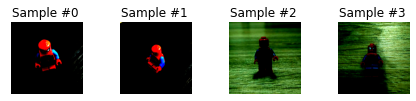

In [21]:
norm_transform = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    #VERSATILE MEAN/STD FROM IMAGENET
    tv.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])
])

#For loop to normalize all images
for i in range(len(torch_lego)):
    #Gets current image
    curr_img = torch_lego[i]['image']
    norm_img = norm_transform(curr_img)
    norm_img_nparr = np.array(norm_img)
    ### SAVE IMAGES TO DATASET BELOW ###
    

# Resizing Images

In [18]:

class Rescale(object):
    #output_size MUST be a tuple --> No need for simply int arg
    def __init__(self, output_size):
        assert isinstance(output_size, tuple)
        self.output_size = output_size
    
    def __call__(self, sample):
        img = sample['image']
        
        h, w = img.shape[:2]
        new_h, new_w = self.output_size
        new_h, new_w = int(new_h), int(new_w)
        
        img = skimage.transform.resize(img, (new_h, new_w))
        
        return {'image': img}

scale = Rescale((256,256))
scale_trans = tv.transforms.Compose([
    Rescale((256,256))
])

print(enumerate(scale, scale_trans))

TypeError: 'Compose' object cannot be interpreted as an integer